In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib as mpl

In [2]:
df =pd.DataFrame()

In [3]:
data = pd.read_csv('HCEPDB_moldata.csv')

In [4]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1


In [6]:
data['mass_group']= pd.cut(data['mass'],10)

In [7]:
data.head()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str,mass_group
0,655365,C1C=CC=C1c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,C18H9N3OSSe,394.3151,5.161953,0.867601,91.567575,-5.467601,2.022944,-3.444656,C1=CC=C(C1)c1cc2[se]c3c4occc4c4nsnc4c3c2cn1,"(375.486, 427.298]"
1,1245190,C1C=CC=C1c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH2]...,C22H15NSeSi,400.4135,5.261398,0.504824,160.401549,-5.104824,1.630750,-3.474074,C1=CC=C(C1)c1cc2[se]c3c(ncc4ccccc34)c2c2=C[SiH...,"(375.486, 427.298]"
2,21847,C1C=c2ccc3c4c[nH]cc4c4c5[SiH2]C(=Cc5oc4c3c2=C1...,C24H17NOSi,363.4903,0.000000,0.000000,197.474780,-4.539526,1.462158,-3.077368,C1=CC=C(C1)C1=Cc2oc3c(c2[SiH2]1)c1c[nH]cc1c1cc...,"(323.674, 375.486]"
3,65553,[SiH2]1C=CC2=C1C=C([SiH2]2)C1=Cc2[se]ccc2[SiH2]1,C12H12SeSi3,319.4448,6.138294,0.630274,149.887545,-5.230274,1.682250,-3.548025,C1=CC2=C([SiH2]1)C=C([SiH2]2)C1=Cc2[se]ccc2[Si...,"(271.862, 323.674]"
4,720918,C1C=c2c3ccsc3c3[se]c4cc(oc4c3c2=C1)C1=CC=CC1,C20H12OSSe,379.3398,1.991366,0.242119,126.581347,-4.842119,1.809439,-3.032680,C1=CC=C(C1)c1cc2[se]c3c4sccc4c4=CCC=c4c3c2o1,"(375.486, 427.298]"


In [9]:
data.groupby(['mass_group']).count()

,id,SMILES_str,stoich_str,mass,pce,voc,jsc,e_homo_alpha,e_gap_alpha,e_lumo_alpha,tmp_smiles_str
mass_group,,,,,,,,,,,
"(167.72, 220.05]",937,937,937,937,937,937,937,937,937,937,844
"(220.05, 271.862]",21253,21253,21253,21253,21253,21253,21253,21253,21253,21253,20080
"(271.862, 323.674]",132159,132159,132159,132159,132159,132159,132159,132159,132159,132159,124329
"(323.674, 375.486]",395811,395811,395811,395811,395811,395811,395811,395811,395811,395811,373490
"(375.486, 427.298]",749908,749908,749908,749908,749908,749908,749908,749908,749908,749908,715158
"(427.298, 479.111]",729369,729369,729369,729369,729369,729369,729369,729369,729369,729369,699620
"(479.111, 530.923]",247833,247833,247833,247833,247833,247833,247833,247833,247833,247833,236177
"(530.923, 582.735]",41111,41111,41111,41111,41111,41111,41111,41111,41111,41111,39588
"(582.735, 634.547]",4176,4176,4176,4176,4176,4176,4176,4176,4176,4176,4093


In [11]:
data.groupby(['mass_group'])['e_homo_alpha'].describe()

,count,mean,std,min,25%,50%,75%,max
mass_group,,,,,,,,
"(167.72, 220.05]",937.0,-5.401061,0.557376,-6.778957,-5.832407,-5.426392,-4.956289,-4.246327
"(220.05, 271.862]",21253.0,-5.267026,0.425210,-6.735583,-5.561528,-5.255289,-4.965691,-4.017991
"(271.862, 323.674]",132159.0,-5.257699,0.401810,-6.853508,-5.533472,-5.249682,-4.972213,-3.933878
"(323.674, 375.486]",395811.0,-5.233774,0.351095,-6.619264,-5.471642,-5.232103,-4.992473,-4.012532
"(375.486, 427.298]",749908.0,-5.183407,0.298693,-7.512315,-5.384486,-5.177914,-4.978201,-3.632374
"(427.298, 479.111]",729369.0,-5.136794,0.258582,-6.945709,-5.305902,-5.123794,-4.956888,-4.121300
"(479.111, 530.923]",247833.0,-5.115852,0.255179,-7.322424,-5.280935,-5.101698,-4.938751,-4.110875
"(530.923, 582.735]",41111.0,-5.117461,0.231310,-6.173343,-5.269790,-5.112157,-4.959621,-4.279071
"(582.735, 634.547]",4176.0,-5.106992,0.181727,-5.967012,-5.221239,-5.104840,-4.993917,-4.603619


In [12]:
%matplotlib inline

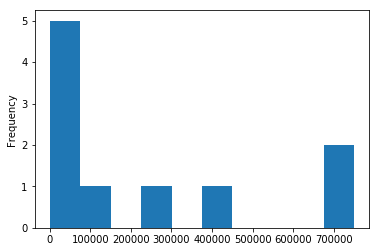

In [15]:
data.groupby(['mass_group'])['e_homo_alpha'].count().plot.hist(10)